# Exploratory Data Analysis

## Import Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [2]:
ratings_df = pd.read_csv("data/ratings_Beauty.csv")
ratings_df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [3]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [4]:
ratings_df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


### Check Null

In [5]:
ratings_df.isna().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [6]:
ratings_df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

### Total User

In [7]:
len(ratings_df.UserId.unique())

1210271

### Total Product

In [8]:
len(ratings_df.ProductId.unique())

249274

### User Transaction Frequency

In [9]:
transation_freq = ratings_df.UserId.value_counts()
transation_freq.head(10)

A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
ALQGOMOY1F5X9     275
AKMEY1BSHSDG7     269
A3R9H6OKZHHRJD    259
A1M04H40ZVGWVG    249
A1RRMZKOMZ2M7J    225
Name: UserId, dtype: int64

In [10]:
transation_freq.tail(10)

A18P66N0Y06AUP    1
A1WLW87J32MV2O    1
A1QKELWX3FJ1U6    1
A3A4GA5I1EEHE5    1
A2O7K7AMXGPDR5    1
AFLE9ZCCERY6L     1
A2U2AW7L2BU1S     1
A2KNQZY2DU4H8I    1
A6J6SJ1063P79     1
A3MQDRRGC9070R    1
Name: UserId, dtype: int64

### Product Rating

In [11]:
product_rating = ratings_df.groupby('ProductId').Rating.mean().reset_index()
product_rating

,ProductId,Rating
0,0205616461,5.0
1,0558925278,4.0
2,0733001998,4.0
3,0737104473,1.0
4,0762451459,5.0
...,...,...
249269,B00LORWRJA,5.0
249270,B00LOS7MEE,5.0
249271,B00LP2YB8E,5.0
249272,B00LPVG6V0,5.0


In [12]:
# Average rating of product before rounding
product_rating.Rating.nunique()

5213

In [13]:
# Round rating to 1 float
product_rating.Rating = product_rating.Rating.apply(lambda x: round(x,1))

# Average rating of product after rounding
product_rating.Rating.nunique()

41

In [14]:
# List of group rating after rounding
group_rating = product_rating.Rating.unique()
group_rating

array([5. , 4. , 1. , 4.3, 3.6, 3. , 2. , 3.8, 3.7, 2.3, 3.5, 4.2, 4.9,
       4.8, 3.3, 4.6, 4.5, 4.7, 3.2, 4.1, 2.5, 3.1, 4.4, 3.4, 3.9, 2.6,
       2.7, 1.2, 2.8, 2.4, 2.2, 2.9, 1.5, 1.7, 1.8, 1.9, 1.3, 1.6, 2.1,
       1.4, 1.1])

In [15]:
from natsort import index_natsorted

reviews = product_rating.Rating.sort_values(ascending=False).value_counts().reset_index()

# rename reviews column name and datatype
reviews.columns = ["rating","score"]
reviews = reviews.sort_values(by="rating",key=lambda x: np.argsort(index_natsorted(reviews["rating"])), ascending=False).reset_index(drop=True)
reviews.head()

,rating,score
0,5.0,95907
1,4.9,1950
2,4.8,6042
3,4.7,7341
4,4.6,5116


In [16]:
# Good reviews
round(reviews[reviews.rating >= reviews.rating[10]].score.sum() / reviews.score.sum(), 2)

0.73

[]

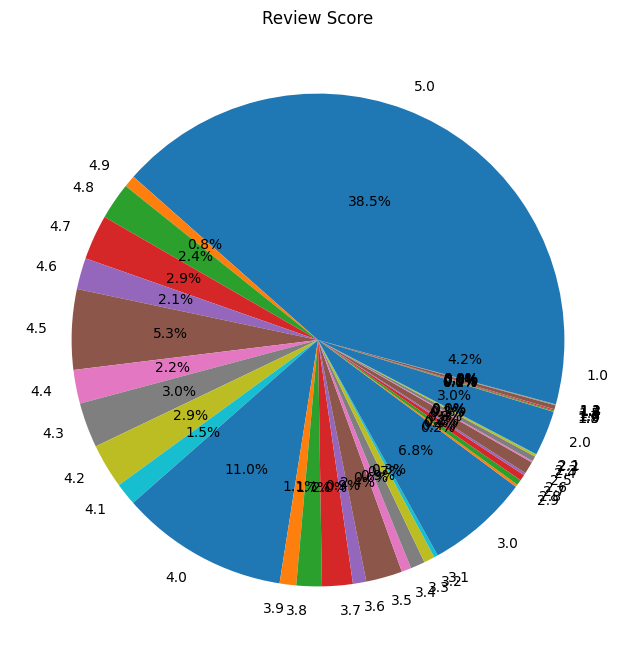

In [17]:
plt.figure(figsize=(10,8))
plt.pie(reviews.score, labels=reviews.rating, autopct='%1.1f%%')
plt.title("Review Score")
plt.plot()

# Modeling

## Pendekatan Pertama : Berdasarkan Popularitas Produk untuk Pengguna Baru

### Import Dependencies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

### Most Popular Product

In [19]:
popular_products = pd.DataFrame(ratings_df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head()

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


<AxesSubplot: xlabel='ProductId'>

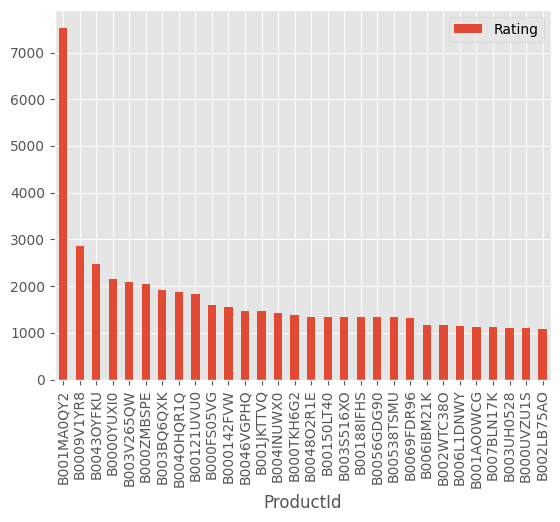

In [20]:
most_popular.head(30).plot(kind = "bar")

## Pendekatan Kedua : Model-based Collaborative Filtering System
Berdasarkan riwayat transaksi pengguna dan rating yang diperoleh dari user lain yang membeli item yang 

In [21]:
# Pivot table will generate too much data, subset the dataframe
ratings_df_subset = ratings_df.head(10000)


In [22]:
### Utility Matrix based on products sold and user reviews
ratings_utility_matrix = ratings_df_subset.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
ratings_utility_matrix.shape

(9697, 886)

In [24]:
# Transposing the matrix

X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X.shape

(886, 9697)

### Cosine Similarity

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity
cosine_sim = cosine_similarity(X) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
cosine_sim.shape

(886, 886)

In [28]:
# Dataframe of cosine_sim variable
cosine_sim_df = pd.DataFrame(cosine_sim, index=X.index, columns=X.index)
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (886, 886)


ProductId,9790776209,9790795351,9790773609,9790777981,9790787383
ProductId,,,,,
9788072097,0.0,0.0,0.0,0.0,0.0
9790781946,0.0,0.0,0.0,0.0,0.0
9601403825,0.0,0.0,0.0,0.0,0.0
6040652705,0.0,0.0,0.0,0.0,0.0
9788074995,0.0,0.0,0.0,0.0,0.0
9790779798,0.0,0.0,0.0,0.0,0.0
B000052YKU,0.0,0.0,0.0,0.0,0.0
9790792271,0.0,0.0,0.0,0.0,0.0
9790786875,0.0,0.0,0.0,0.0,0.0


In [29]:
cosine_sim_df

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
B000052YPV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
B000052YPY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
# get recommendation
def recommendation_cosine(product_id, k=10):
    # Range(start, stop, step)
    index = cosine_sim_df.loc[:,product_id].to_numpy().argpartition(
        range(-1, -k, -1))

    # Choose the most similar product
    closest = cosine_sim_df.columns[index[-1:-(k+2):-1]]

    # Drop searched product
    closest = closest.drop(product_id, errors='ignore')
    print(list(closest))

### SVD

In [31]:
# Decomposing the Matrix
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [32]:
# Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [33]:
def recommendation_svd(product_id):
    product_names = list(X.index)
    product_ID = product_names.index(product_id)
    
    # Correlation of this_product
    correlation_product_ID = correlation_matrix[product_ID]
    correlation_product_ID.shape
    
    Recommend = list(X.index[correlation_product_ID > 0.90])

    # Removes the item already bought by the customer
    Recommend.remove(product_id) 

    print(list(Recommend[:10]))

### Test Recommending top 10 highly correlated products in sequence

In [34]:
test_product = "6117036094"

In [35]:
recommendation_cosine(test_product)

['B000052YQ2', '9790771401', '9790771444', '9790771479', '9790771347', '9790771339', '9790771584', '9790771517', '9790771762', '9790771568']


In [36]:
recommendation_svd(test_product)

['0733001998', '0762451459', '1304146537', '1304168522', '1304196070', '1304482596', '1304488608', '1304495396', '130451112X', '1304622428']
